# Projet final de l'analyse des donnees historiques sur les stocks et le recettes 

In [3]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max") 

tesla_data = tesla_data.reset_index()


tesla_data.to_csv("tesla_data.csv", index=False)

tesla_data.head())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text


soup = BeautifulSoup(html_data, 'html.parser')

# 3. Création du DataFrame vide
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# 4. Extraction des lignes du tableau
for row in soup.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue,
                                   pd.DataFrame({"Date":[date], "Revenue":[revenue]})],
                                  ignore_index=True)

# 5. Nettoyage de la colonne “Revenue” (suppression des «$» et des «,»)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r'[,\$]', "", regex=True)

# 6. Affichage des 5 dernières lignes
print(tesla_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

In [23]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")  

gme_data = gme_data.reset_index()

gme_data.to_csv("gme_data.csv", index=False)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue,
                                 pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                                ignore_index=True)


gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[\$,]', '', regex=True)

#print(gme_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue,
                                 pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                                ignore_index=True)


gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[\$,]', '', regex=True)

#print(gme_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

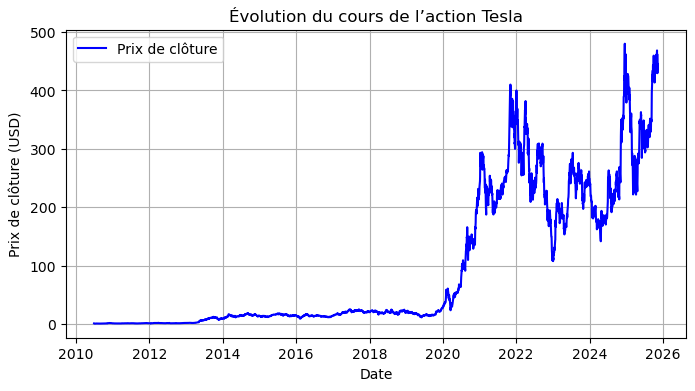

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

def make_graph(df, title):
    plt.figure(figsize=(8,4))  # Taille réduite du graphique
    plt.plot(df["Date"], df["Close"], label="Prix de clôture", color='blue')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Prix de clôture (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Évolution du cours de l’action Tesla")


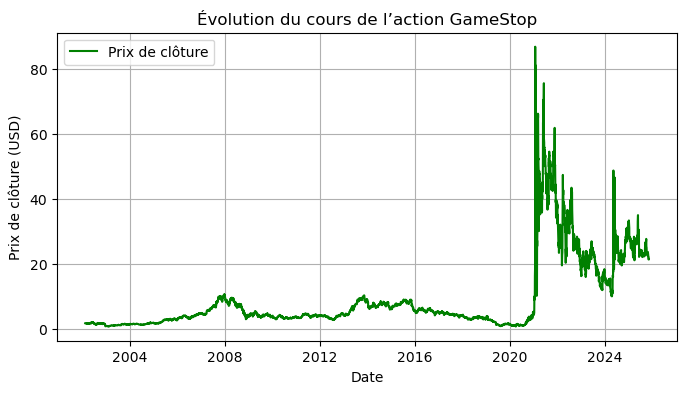

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Télécharger les données boursières de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# 2️⃣ Réinitialiser l'index
gme_data.reset_index(inplace=True)

# 3️⃣ Définir la fonction make_graph (si pas déjà définie)
def make_graph(df, title):
    plt.figure(figsize=(8,4))  # Graphique de taille moyenne
    plt.plot(df["Date"], df["Close"], label="Prix de clôture", color='green')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Prix de clôture (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# 4️⃣ Tracer le graphique de GameStop
make_graph(gme_data, "Évolution du cours de l’action GameStop")
